# GridSearchCV

GridSearchCV es una técnica utilizada en aprendizaje automático para encontrar los mejores hiperparámetros para un modelo mediante la búsqueda exhaustiva de todas las combinaciones posibles de valores de hiperparámetros dentro de un rango especificado. Es parte de la biblioteca scikit-learn en Python y se utiliza comúnmente para optimizar modelos de machine learning.


Grid Search: Define una "cuadrícula" de hiperparámetros, que es esencialmente una tabla de valores posibles para cada hiperparámetro. Por ejemplo, si tienes dos hiperparámetros con tres posibles valores cada uno, la cuadrícula tendría 3 * 3 = 9 combinaciones posibles.

- Cross-Validation (Validación Cruzada): Para cada combinación de hiperparámetros en la cuadrícula, se realiza una validación cruzada para evaluar el rendimiento del modelo. La validación cruzada ayuda a estimar cómo se generalizará el modelo a datos no vistos al dividir los datos en conjuntos de entrenamiento y prueba múltiples veces.

- CV (Cross-Validation): El "CV" en GridSearchCV se refiere al uso de validación cruzada durante la búsqueda de la cuadrícula.

- GridSearchCV devuelve el conjunto óptimo de hiperparámetros que produce el mejor rendimiento del modelo según una métrica específica, como la precisión, el F1-score, etc. Este conjunto óptimo de hiperparámetros se puede utilizar para entrenar el modelo final que se utilizará para hacer predicciones en nuevos datos.

 `GridSearchCV se puede utilizar tanto para modelos de regresión como para modelos de clasificación en el contexto del aprendizaje automático`

## Creando un grid con el modelo CVR

In [37]:

# Importing libraries
from sklearn.datasets import load_diabetes
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import seaborn as sns

X,y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1000) 

# X.skew() #Para ver a donde se seplaza su distribución
# X.mean() # Para ver su promedio

In [38]:
# Creamos nuestro modelo

model = SVR(C=1)
model.fit(X_train, y_train)

SVR(C=1)

<Axes: xlabel='target', ylabel='target'>

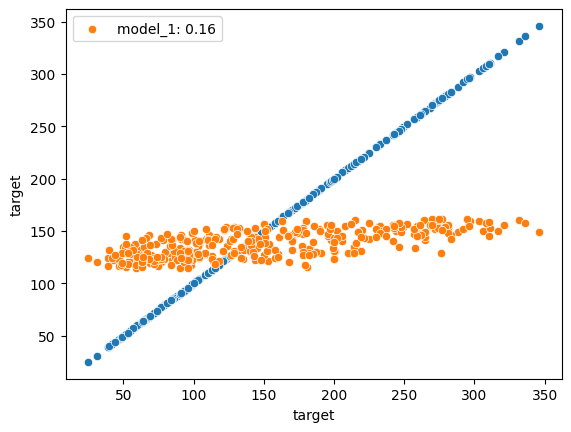

In [39]:
# Graficamos nuestro conjunto de entrenamiento y nuestra predicción

sns.scatterplot(y=y_train,x=y_train )
sns.scatterplot(y= model.predict(X_train), x=y_train, label= f'model_1: {model.score(X_train, y_train).round(2)}') 

In [40]:
# SVR()

# Establecemos los parametros que llevara el modelo
p_grid = {
    'kernel': ['rbf', 'poly'],
    'degree': np.arange(1,6),
    'C': np.logspace(-3,3,7)

}

# Creamos un Grid con nuestro modelo, los parametros y las validaciónes cruzadas.
grid =GridSearchCV(model, param_grid=p_grid, cv= 5) 
grid

GridSearchCV(cv=5, estimator=SVR(C=1),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'degree': array([1, 2, 3, 4, 5]),
                         'kernel': ['rbf', 'poly']})

In [44]:
%%time

# Entrenamos el modelo y mostramos el tiempo de ejecucion
grid.fit(X_train,y_train)

CPU times: total: 3.27 s
Wall time: 4.04 s


GridSearchCV(cv=5, estimator=SVR(C=1),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'degree': array([1, 2, 3, 4, 5]),
                         'kernel': ['rbf', 'poly']})

In [45]:
# Creamos un df del modelo para su consulta.

df = pd.DataFrame(grid.cv_results_)
# df

<Axes: xlabel='target', ylabel='target'>

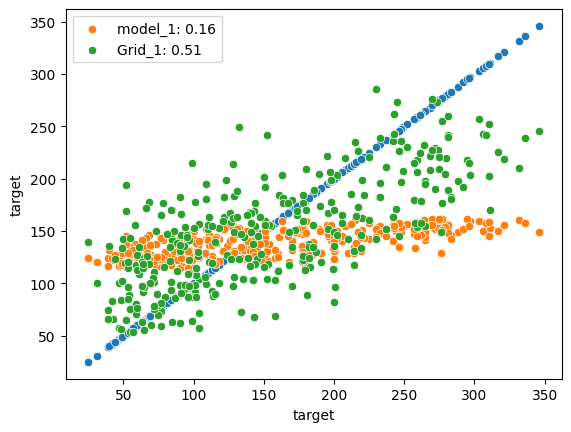

In [46]:
# Graficamos los resultados

sns.scatterplot(y=y_train,x=y_train )
sns.scatterplot(y= model.predict(X_train), x=y_train, label= f'model_1: {model.score(X_train, y_train).round(2)}') 
sns.scatterplot(y= grid.predict(X_train), x=y_train, label= f'Grid_1: {grid.score(X_train, y_train).round(2)}') 

## Creando un modelo con arbol de decisión con algoritmo de regresión.

In [106]:

# Importing libraries
from sklearn.datasets import load_diabetes
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns


In [70]:
# Loading diabetes dataset
X,y =load_diabetes(return_X_y=True, as_frame=True)

# Splitting into train ant test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1000)

# Creating the model
model = DecisionTreeRegressor()

param_g= {
'random_state': [1000],
'max_depth' : np.arange(1,6),
'min_samples_split' : np.arange(2,6)
}

grid = GridSearchCV(model, param_grid=param_g, cv=200)

In [75]:
grid.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5]),
                         'min_samples_split': array([2, 3, 4, 5]),
                         'random_state': [1000]})

In [105]:
# print(grid.best_score_)
print(grid.best_params_)

best_max_depth = grid.best_params_['max_depth']
best_min_samples_split = grid.best_params_['min_samples_split']
state = grid.best_params_['random_state']

{'max_depth': 2, 'min_samples_split': 2, 'random_state': 1000}


1000

In [109]:

predict = model.predict(X_test)
RMSE = mean_squared_error(y_test, predict)
print(RMSE)

3859.984802142402


Es decir que tendrá un error de 3859 unidades?

## GridSearchCV para RandomForestClassifier